<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/LegalNERwWW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to select the best nmodel for NER for Legal Documents with WeightWatcher

We compare 2 HuggingFace pretrained models for Lehal NER 

- nlpaueb/legal-bert-base-uncased

- saibo/legal-roberta-base

We apply the weightwatcher tool to each model, and look at the distribution of layer alphas 

While we might expect the RoBERTa (Robust Bert) model to perform better,
the weightwatcher layer metrics show that most of BERT layers have 
smaller alphas than the RoBERTa, indicating that most the of the BERT
layers should perform better than the RoBERTa layers.


---



In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
%%capture 
!pip install weightwatcher transformers

In [3]:
from transformers import AutoModel
bert_model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")

roberta_model = AutoModel.from_pretrained("saibo/legal-roberta-base")



Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at saibo/legal-roberta-base were not used when initializing RobertaModel

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

import weightwatcher as ww
import transformers

ww.__version__, transformers.__version__

('0.5.6', '4.21.1')

In [5]:
%%capture
import warnings
warnings.filterwarnings('ignore')


import logging
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.FATAL)

watcher = ww.WeightWatcher(model=bert_model)
bert_details = watcher.analyze()

watcher = ww.WeightWatcher(model=roberta_model)
roberta_details = watcher.analyze()



Text(0.5, 0, 'WeightWatcher Layer Alphas $\\alpha$')

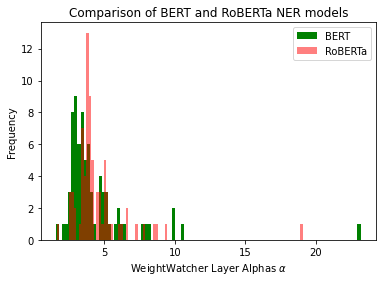

In [23]:
B = bert_details[bert_details.alpha > 0]
B.alpha.plot.hist(bins=100, label='BERT', color='g')
#plt.axvline(B.alpha.mean(), color='g', linestyle='dotted', linewidth=2)

R = roberta_details[roberta_details.alpha > 0]
R.alpha.plot.hist(bins=100, label='RoBERTa', color='r', alpha=0.5)
#plt.axvline(R.alpha.mean(), color='r', linestyle='dotted', linewidth=2)


plt.legend()
plt.title("Comparison of BERT and RoBERTa NER models")
plt.xlabel(r"WeightWatcher Layer Alphas $\alpha$")

In [6]:
while True:
  pass

KeyboardInterrupt: ignored